In [125]:
from IPython.core.display import display, HTML; display(HTML("<style>.container{width:90% !important;}</style>"))
%autosave 60

Autosaving every 60 seconds


# Grzegorz Nowak - analysis of the wines' qualities.

## Description of the problem.

### The goal is to classify wines' types (red / white) using 'Wine Quality' data-set (https://archive.ics.uci.edu/ml/datasets/Wine+Quality) available in the UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets.php). In fact, these are two data-sets related to red and white variants of the Portuguese "Vinho Verde" wine. They are directly available under this link: https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/.

### The data-sets and their possible modelling are described in details in the paper of P. Cortez, A. Cerdeira, F. Almeida, T. Matos & J. Reis. "Modeling wine preferences by data mining from physicochemical properties", published in "Decision Support Systems", Elsevier, Volume 47, Issue 4, Pages 547-553 in November 2009 (https://www.sciencedirect.com/science/article/abs/pii/S0167923609001377?via%3Dihub).

### Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (i.e. there is no data about grape types, wine brand, wine selling price, etc.).

### Above-mentioned input variables that base on the physicochemical tests are included in the first 11 columns of the data-sets:
#### 00 - fixed acidity
#### 01 - volatile acidity
#### 02 - citric acid
#### 03 - residual sugar
#### 04 - chlorides
#### 05 - free sulfur dioxide
#### 06 - total sulfur dioxide
#### 07 - density
#### 08 - pH
#### 09 - sulphates
#### 10 - alcohol
### The only one utput variable that base on the sensory data is given in the last, 12th column of the data-sets:
#### 11 - quality (score between 0 and 10)

### The classes are ordered and not balanced. It is not obvious if all input variables are relevant. Outlier detection algorithms could be used to detect the few excellent or poor wines.

### These data-sets can be viewed as classification or regression tasks. But in fact, it may be approached as a problem of risk assessment that is very common in the financial sector.

## 1. Required libraries.

In [126]:
import numpy as np
import pandas as pd
# SciPy:
# https://scipy.github.io/devdocs/tutorial/general.html
# https://www.guru99.com/scipy-tutorial.html#:~:text=SciPy%20in%20Python%20is%20an,pronounced%20as%20%E2%80%9CSigh%20Pi.%E2%80%9D
import scipy.stats
from scipy.stats import randint
from scipy.stats import uniform
# Ploting libraries.
import matplotlib.pyplot as plt
import seaborn as sns
# Machine learning library scikit-learn (https://scikit-learn.org/stable/user_guide.html).
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, roc_curve, recall_score
#from sklearn.feature_selection import RFE
from sklearn import tree
# Graph visualization software graphviz (https://graphviz.org/).
import graphviz
#
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost.sklearn import XGBClassifier
#
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

## 2. Input data.

### 2.1. Loading data.

In [3]:
wines_w = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep = ';')
wines_r = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep = ';')
#wines_w = pd.read_csv('input/winequality-white.csv', sep = ';')
#wines_r = pd.read_csv('input/winequality-red.csv', sep = ';')

### 2.2. Summarizing data-sets.

#### 2.2.1. Data-set "wines_w".

In [4]:
wines_w.head(7)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6


In [5]:
#Changing spaces in the columns' names to underscores.
wines_w.columns = wines_w.columns.str.replace(' ', '_')
wines_w.head(3)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6


In [6]:
print(f'"wines_w" data-set contains {wines_w.shape[1]} columns and {wines_w.shape[0]} rows.')
#wines_w.shape

"wines_w" data-set contains 12 columns and 4898 rows.


In [7]:
print(f'"wines_w" data-set contains following columns: {list(wines_w.columns)}.')
#wines_w.columns

"wines_w" data-set contains following columns: ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality'].


In [8]:
print(f'"wines_w" data-set contains following types of data: {wines_w.columns.to_series().groupby(wines_w.dtypes).groups}.')

"wines_w" data-set contains following types of data: {int64: ['quality'], float64: ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol']}.


In [9]:
print(f'General information about "wines_w" data-set: {wines_w.info()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         4898 non-null   float64
 1   volatile_acidity      4898 non-null   float64
 2   citric_acid           4898 non-null   float64
 3   residual_sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free_sulfur_dioxide   4898 non-null   float64
 6   total_sulfur_dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB
General information about "wines_w" data-set: None


#### 2.2.2. Data-set "wines_r".

In [10]:
wines_r.head(7)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5


In [11]:
#Changing spaces in the columns' names to underscores.
wines_r.columns = wines_w.columns.str.replace(' ', '_')
wines_r.head(3)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


In [12]:
print(f'"wines_r" data-set contains {wines_r.shape[1]} columns and {wines_r.shape[0]} rows.')
#wines_w.shape

"wines_r" data-set contains 12 columns and 1599 rows.


In [13]:
print(f'"wines_r" data-set contains following columns: {list(wines_r.columns)}.')
#wines_w.columns

"wines_r" data-set contains following columns: ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality'].


In [14]:
print(f'"wines_r" data-set contains following types of data: {wines_r.columns.to_series().groupby(wines_w.dtypes).groups}.')

"wines_r" data-set contains following types of data: {int64: ['quality'], float64: ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol']}.


In [15]:
print(f'General information about "wines_r" data-set: {wines_r.info()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
General information about "wines_r" data-set: None


***
#### Conclusions. Both "wines_w" and "wines_r" data-sets contains the same 12 columns. Therefore it is possible to merge them. But before merging them one can check for any possible missing values and duplicated raws.
***

### 2.3. Adding an additional categorical column with identification of red wines by 1 and white wines by 0.

In [16]:
wines_w['wine_type'] = 0
wines_r['wine_type'] = 1

In [17]:
wines_w.head(7)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6,0


In [18]:
wines_r.head(7)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,1
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,1


### 2.4. Sanity cross-check for any missing values in one of the columns in both data-sets. The info() method used above already provided an information about the number of non-null values in each column of both data-sets, i.e. 4898 and 1599 for "wines_w" and "wines_r", respectively. Below analysis allows to check this directly.

#### 2.4.1. Data-set "wines_w".

In [19]:
print(f'"wines_w" data-set contains {wines_w.shape[0]} rows.')
print(f'Are there any missing values in one of the columns?')
print(f'Answer: {wines_w.isnull().values.any()}.')
print(f'Number of columns with missing values: {wines_w.isnull().values.any().sum()}.')

"wines_w" data-set contains 4898 rows.
Are there any missing values in one of the columns?
Answer: False.
Number of columns with missing values: 0.


In [20]:
for column in wines_w.columns:
    print('--------------------------------------------------------------------------------')
    print(column)
    print(wines_w[column].isnull().value_counts())

--------------------------------------------------------------------------------
fixed_acidity
False    4898
Name: fixed_acidity, dtype: int64
--------------------------------------------------------------------------------
volatile_acidity
False    4898
Name: volatile_acidity, dtype: int64
--------------------------------------------------------------------------------
citric_acid
False    4898
Name: citric_acid, dtype: int64
--------------------------------------------------------------------------------
residual_sugar
False    4898
Name: residual_sugar, dtype: int64
--------------------------------------------------------------------------------
chlorides
False    4898
Name: chlorides, dtype: int64
--------------------------------------------------------------------------------
free_sulfur_dioxide
False    4898
Name: free_sulfur_dioxide, dtype: int64
--------------------------------------------------------------------------------
total_sulfur_dioxide
False    4898
Name: total_sulfur

#### 2.4.2. Data-set "wines_r".

In [21]:
print(f'"wines_r" data-set contains {wines_r.shape[0]} rows.')
print(f'Are there any missing values in one of the columns?')
print(f'Answer: {wines_r.isnull().values.any()}.')
print(f'Number of columns with missing values: {wines_r.isnull().values.any().sum()}.')

"wines_r" data-set contains 1599 rows.
Are there any missing values in one of the columns?
Answer: False.
Number of columns with missing values: 0.


In [22]:
for column in wines_r.columns:
    print('--------------------------------------------------------------------------------')
    print(column)
    print(wines_r[column].isnull().value_counts())

--------------------------------------------------------------------------------
fixed_acidity
False    1599
Name: fixed_acidity, dtype: int64
--------------------------------------------------------------------------------
volatile_acidity
False    1599
Name: volatile_acidity, dtype: int64
--------------------------------------------------------------------------------
citric_acid
False    1599
Name: citric_acid, dtype: int64
--------------------------------------------------------------------------------
residual_sugar
False    1599
Name: residual_sugar, dtype: int64
--------------------------------------------------------------------------------
chlorides
False    1599
Name: chlorides, dtype: int64
--------------------------------------------------------------------------------
free_sulfur_dioxide
False    1599
Name: free_sulfur_dioxide, dtype: int64
--------------------------------------------------------------------------------
total_sulfur_dioxide
False    1599
Name: total_sulfur

***
#### Conclusions. There are any missing values in any data-sets.
***

### 2.5. Checking for duplicated raws and dropping them.

#### 2.5.1. Data-set "wines_w".

##### Number of duplicated rows.

In [23]:
wines_w_duplicated_sum = sum(wines_w.duplicated(subset=None, keep='first'))
print(f'Number of duplicated values in data-set "wines_w" (wines_w_duplicated_sum) is equal to {wines_w_duplicated_sum}.')

Number of duplicated values in data-set "wines_w" (wines_w_duplicated_sum) is equal to 937.


##### Quick visualization of duplicated rows.

In [24]:
wines_w_duplicated = wines_w[wines_w.duplicated(keep=False)].sort_values('fixed_acidity').sort_values('volatile_acidity')
wines_w_duplicated.head(7)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,wine_type
1480,7.2,0.080,0.49,1.3,0.050,18.0,148.0,0.99450,3.46,0.44,10.2,6,0
1475,7.2,0.080,0.49,1.3,0.050,18.0,148.0,0.99450,3.46,0.44,10.2,6,0
973,6.5,0.080,0.33,1.9,0.028,23.0,93.0,0.99100,3.34,0.70,12.0,7,0
968,6.5,0.080,0.33,1.9,0.028,23.0,93.0,0.99100,3.34,0.70,12.0,7,0
4801,6.4,0.105,0.29,1.1,0.035,44.0,140.0,0.99142,3.17,0.55,10.7,7,0
4795,6.4,0.105,0.29,1.1,0.035,44.0,140.0,0.99142,3.17,0.55,10.7,7,0
4796,6.4,0.105,0.29,1.1,0.035,44.0,140.0,0.99142,3.17,0.55,10.7,7,0


##### Dropping duplicated rows.

In [25]:
wines_w_cleaned = wines_w.drop_duplicates()
wines_w_cleaned.reset_index()

,index,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,0
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,0
2,2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,0
3,3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,0
4,6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.99490,3.18,0.47,9.6,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3956,4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
3957,4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
3958,4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
3959,4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


#### 2.5.2. Data-set "wines_r".

##### Number of duplicated rows.

In [26]:
wines_r_duplicated_sum = sum(wines_r.duplicated(subset=None, keep='first'))
print(f'Number of duplicated values in data-set "wines_r" (wines_r_duplicated_sum) is equal to {wines_r_duplicated_sum}.')

Number of duplicated values in data-set "wines_r" (wines_r_duplicated_sum) is equal to 240.


##### Quick visualization of duplicated rows.

In [27]:
wines_r_duplicated = (wines_r[wines_r.duplicated(keep=False)].sort_values('fixed_acidity')).sort_values('volatile_acidity')
wines_r_duplicated.head(7)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,wine_type
948,8.9,0.12,0.45,1.8,0.075,10.0,21.0,0.99552,3.41,0.76,11.9,7,1
949,8.9,0.12,0.45,1.8,0.075,10.0,21.0,0.99552,3.41,0.76,11.9,7,1
950,8.9,0.12,0.45,1.8,0.075,10.0,21.0,0.99552,3.41,0.76,11.9,7,1
271,11.5,0.18,0.51,4.0,0.104,4.0,23.0,0.99960,3.28,0.97,10.1,6,1
277,11.5,0.18,0.51,4.0,0.104,4.0,23.0,0.99960,3.28,0.97,10.1,6,1
1018,8.0,0.18,0.37,0.9,0.049,36.0,109.0,0.99007,2.89,0.44,12.7,6,1
1017,8.0,0.18,0.37,0.9,0.049,36.0,109.0,0.99007,2.89,0.44,12.7,6,1


##### Dropping duplicated rows.

In [28]:
wines_r_cleaned = wines_r.drop_duplicates()
wines_r_cleaned.reset_index()

,index,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1354,1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1
1355,1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1
1356,1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1
1357,1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1


***
#### Conclusions. We removed all duplicated rows from both data-sets (937 from "wines_w" data-set and "wines_r" data-set and 240 from "wines_r" one). We also reset the indices in both data-sets.
***

### 2.6. Merging both data-sets into one.

In [29]:
wines = pd.concat([wines_w_cleaned, wines_r_cleaned], axis=0)

In [30]:
print(f'"wines" data-set contains {wines.shape[1]} columns and {wines.shape[0]} rows.')
#wines_w.shape

"wines" data-set contains 13 columns and 5320 rows.


In [31]:
wines.head(7)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
6,6.2,0.32,0.16,7.00,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6,0
9,8.1,0.22,0.43,1.50,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6,0
10,8.1,0.27,0.41,1.45,0.033,11.0,63.0,0.9908,2.99,0.56,12.0,5,0


In [32]:
wines.tail(7)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,wine_type
1591,5.4,0.740,0.09,1.7,0.089,16.0,26.0,0.99402,3.67,0.56,11.6,6,1
1592,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6,1


## 3. Basic statistical description of the data.

### 3.1. Categorical data.

In [33]:
wines.wine_type.value_counts(normalize = True)

0    0.744549
1    0.255451
Name: wine_type, dtype: float64

***
#### Conclusions. The merged data-set contains 74.4% of white wines and 25.6% of red wines. It is not very balanced data-set.
***

### 3.2. Numerical data.

#### 3.2.1. Basic statistical information using .describe() and .agg() methods.

In [34]:
wines.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,wine_type
count,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000
mean,7.215179,0.344130,0.318494,5.048477,0.056690,30.036654,114.109023,0.994535,3.224664,0.533357,10.549241,5.795677,0.255451
std,1.319671,0.168248,0.147157,4.500180,0.036863,17.805045,56.774223,0.002966,0.160379,0.149743,1.185933,0.879772,0.436155
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.240000,1.800000,0.038000,16.000000,74.000000,0.992200,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.300000,0.310000,2.700000,0.047000,28.000000,116.000000,0.994650,3.210000,0.510000,10.400000,6.000000,0.000000
75%,7.700000,0.410000,0.400000,7.500000,0.066000,41.000000,153.250000,0.996770,3.330000,0.600000,11.400000,6.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


In [35]:
wines.agg(['mean', 'median', 'std'])

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,wine_type
mean,7.215179,0.344130,0.318494,5.048477,0.056690,30.036654,114.109023,0.994535,3.224664,0.533357,10.549241,5.795677,0.255451
median,7.000000,0.300000,0.310000,2.700000,0.047000,28.000000,116.000000,0.994650,3.210000,0.510000,10.400000,6.000000,0.000000
std,1.319671,0.168248,0.147157,4.500180,0.036863,17.805045,56.774223,0.002966,0.160379,0.149743,1.185933,0.879772,0.436155


***
#### Conclusions. 
#### 1. There are any negative values for any of numerical columns (a minimum value is equal to 0 for 'citric acid' only). Eveyrthing seems to be OK as we should not expect negative values for neither the physicochemical variables (i.e. inputs in column 00-10), nor for sensory variable (i.e. output in column 11, 'quality').
#### 2. Means and medians for all columns are quite close to each other. Only for 'resudual_sugar' median is clearly lower than mean what may indicate a skewness of 'residual_sugar' distribution.
***

#### 3.2.2. Checking distribution of the numerical variables on the plots.

##### Distribution plots with the 'seaborn' library.

/home/gnowak/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/gnowak/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/gnowak/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplo

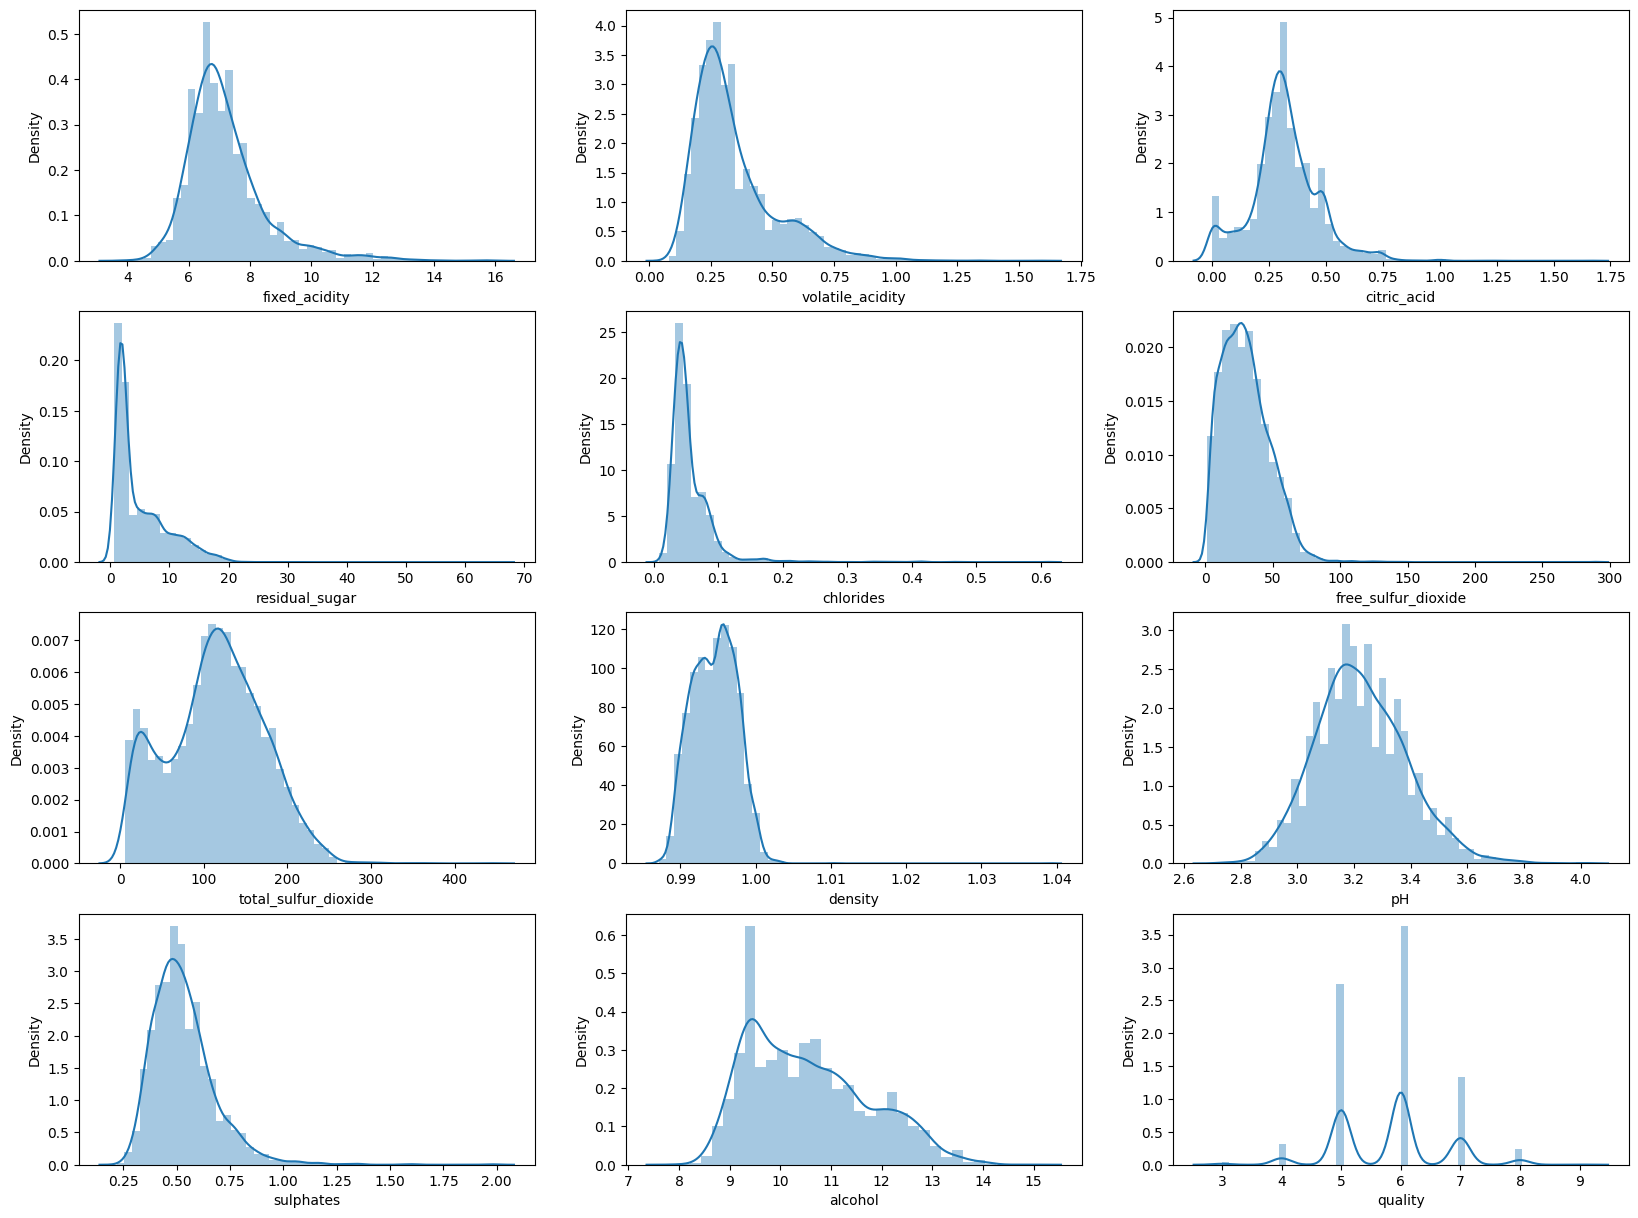

In [36]:
plt.figure(figsize=(20, 15))
#
plt.subplot(4, 3, 1)
sns.distplot(wines['fixed_acidity'])
plt.subplot(4, 3, 2)
sns.distplot(wines['volatile_acidity'])
plt.subplot(4, 3, 3)
sns.distplot(wines['citric_acid'])
plt.subplot(4, 3, 4)
sns.distplot(wines['residual_sugar'])
#
plt.subplot(4, 3, 5)
sns.distplot(wines['chlorides'])
plt.subplot(4, 3, 6)
sns.distplot(wines['free_sulfur_dioxide'])
plt.subplot(4, 3, 7)
sns.distplot(wines['total_sulfur_dioxide'])
plt.subplot(4, 3, 8)
sns.distplot(wines['density'])
#
plt.subplot(4, 3, 9)
sns.distplot(wines['pH'])
plt.subplot(4, 3, 10)
sns.distplot(wines['sulphates'])
plt.subplot(4, 3, 11)
sns.distplot(wines['alcohol'])
plt.subplot(4, 3, 12)
sns.distplot(wines['quality'])
#
plt.show()

***
#### Conclusions. Distribution of the 'residual_sugar' variable is indeed skew. For some extend it is alsovisible in the case of 'volatile acidity'. Bimodal distributions are visible in the case of 'total_sulfur_dioxide' and for 'density'. There are quite a lot measurements with 'alcohole' value on a range ~9.2--9.4. Most of the values for the outcome, i.e. for column 'quality' are in a range '5--7'.
***

##### Box plot for entire data frame.

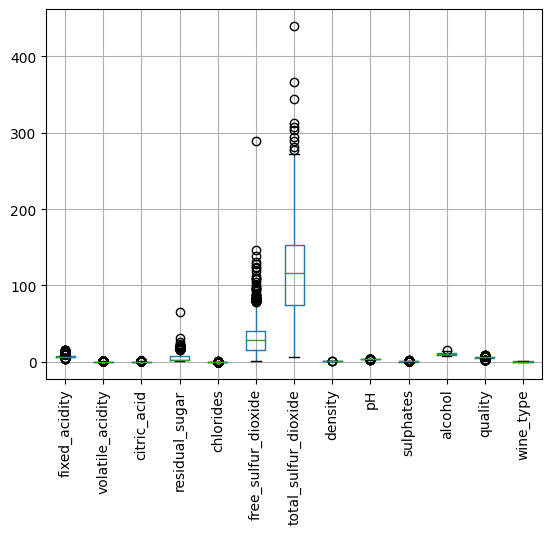

In [37]:
wines.boxplot()
plt.xticks(rotation = 90)# Rotates x axis ticks by 90 degrees.
plt.show()

In [38]:
#sns.boxplot(data=wines, palette='colorblind')
#plt.show()

##### Individual box plots separately for each numerical column with the 'seaborn' library.

/home/gnowak/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/gnowak/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/gnowak/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/gnowak/.lo

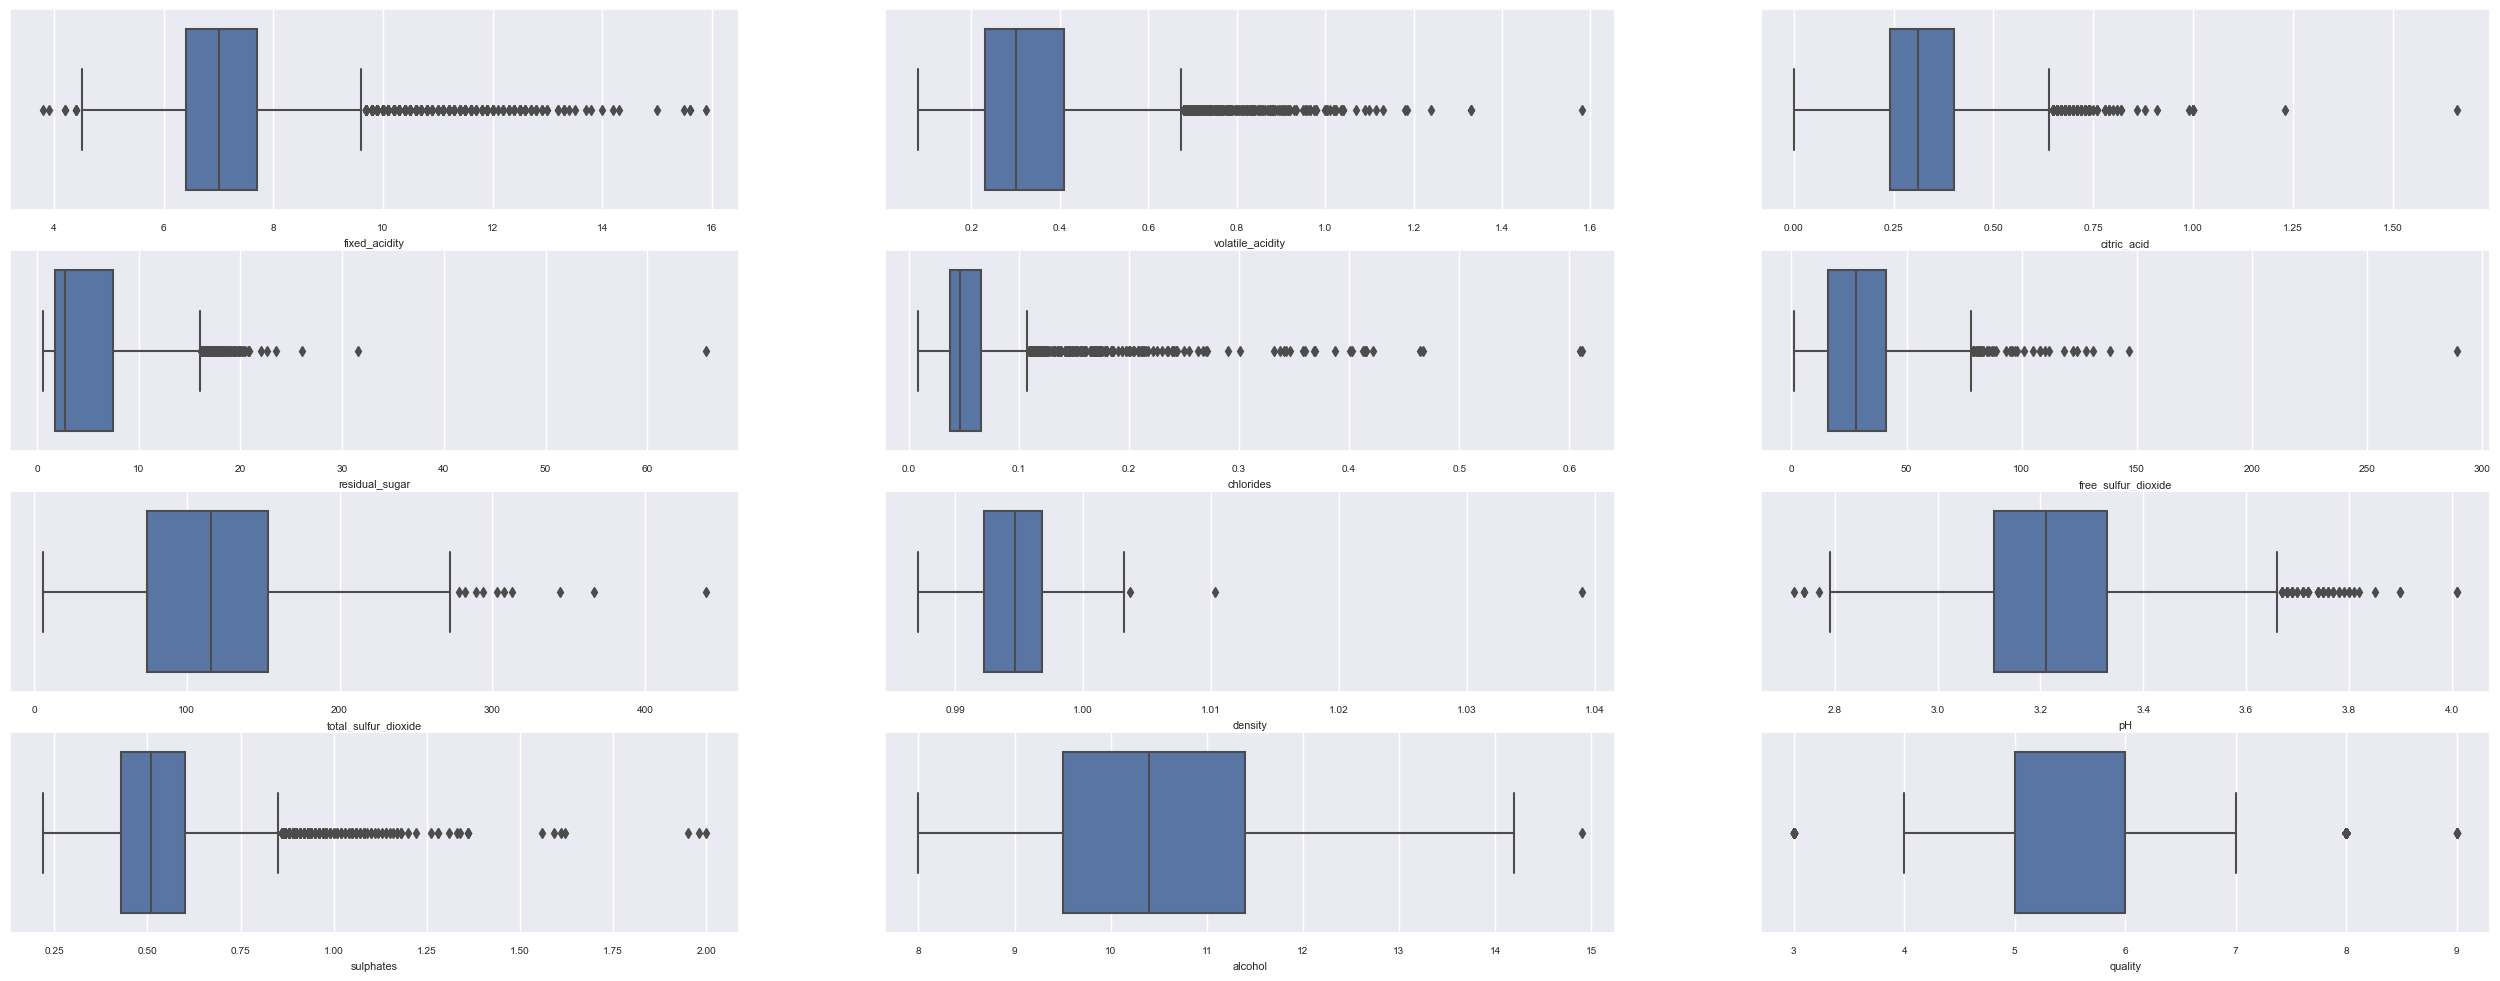

In [39]:
plt.figure(figsize=(32, 12))
sns.set(font_scale=0.66)
#
plt.subplot(4, 3, 1)
sns.boxplot(wines['fixed_acidity'])
plt.subplot(4, 3, 2)
sns.boxplot(wines['volatile_acidity'])
plt.subplot(4, 3, 3)
sns.boxplot(wines['citric_acid'])
plt.subplot(4, 3, 4)
sns.boxplot(wines['residual_sugar'])
#
plt.subplot(4, 3, 5)
sns.boxplot(wines['chlorides'])
plt.subplot(4, 3, 6)
sns.boxplot(wines['free_sulfur_dioxide'])
plt.subplot(4, 3, 7)
sns.boxplot(wines['total_sulfur_dioxide'])
plt.subplot(4, 3, 8)
sns.boxplot(wines['density'])
#
plt.subplot(4, 3, 9)
sns.boxplot(wines['pH'])
plt.subplot(4, 3, 10)
sns.boxplot(wines['sulphates'])
plt.subplot(4, 3, 11)
sns.boxplot(wines['alcohol'])
plt.subplot(4, 3, 12)
sns.boxplot(wines.quality)
#
plt.show()

***
#### Conclusions. In the case of every variable we see outliers indicated on the box plots as a black symbols. We may check if the outliers should be removed before using any linear algorithms.
***

#### 3.2.3. Identifying outliers based on 1.5 interquartile range (IQR). I.e. all data that are outside a (Q1 - 1.5IQR, Q3 + 1.5IQR) range are treated as outliers (where Q1 is the lower quartile that corresponds with the 25th percentile, Q3 is the upper quartile that corresponds with the 75th percentile, and IQR = Q3 − Q1).

In [40]:
q1 = wines.quantile(0.25)
print(f'Q1:')
print(f'{q1}')
q3 = wines.quantile(0.75)
print(f'Q3:')
print(f'{q3}')
iqr = q3 - q1
iqr
print(f'IQR:')
print(f'{iqr}')
iqr1p5_low_boundary = (q1 - 1.5 * iqr)
iqr1p5_upp_boundary = (q3 + 1.5 * iqr)
print(f'iqr1p5_low_boundary:')
print(f'{iqr1p5_low_boundary}')
print(f'iqr1p5_upp_boundary:')
print(f'{iqr1p5_upp_boundary}')
iqr1p5_outliers_num_L = (wines[iqr.index] < iqr1p5_low_boundary).sum()
iqr1p5_outliers_num_U = (wines[iqr.index] > iqr1p5_upp_boundary).sum()
iqr1p5_outliers = pd.DataFrame({'iqr1p5_low_boundary':iqr1p5_low_boundary, 'iqr1p5_upp_boundary':iqr1p5_upp_boundary,'iqr1p5_outliers_num_L':iqr1p5_outliers_num_L, 'iqr1p5_outliers_num_U':iqr1p5_outliers_num_U})
iqr1p5_outliers
iqr1p5_outliers_num = iqr1p5_outliers['iqr1p5_outliers_num_L'].sum() + iqr1p5_outliers['iqr1p5_outliers_num_U'].sum()
print(f'iqr1p5_outliers_num = {iqr1p5_outliers_num}. This is {(iqr1p5_outliers_num/wines.shape[0])*100.0} % of entire data-set.')

Q1:
fixed_acidity            6.4000
volatile_acidity         0.2300
citric_acid              0.2400
residual_sugar           1.8000
chlorides                0.0380
free_sulfur_dioxide     16.0000
total_sulfur_dioxide    74.0000
density                  0.9922
pH                       3.1100
sulphates                0.4300
alcohol                  9.5000
quality                  5.0000
wine_type                0.0000
Name: 0.25, dtype: float64
Q3:
fixed_acidity             7.70000
volatile_acidity          0.41000
citric_acid               0.40000
residual_sugar            7.50000
chlorides                 0.06600
free_sulfur_dioxide      41.00000
total_sulfur_dioxide    153.25000
density                   0.99677
pH                        3.33000
sulphates                 0.60000
alcohol                  11.40000
quality                   6.00000
wine_type                 1.00000
Name: 0.75, dtype: float64
IQR:
fixed_acidity            1.30000
volatile_acidity         0.18000
citric_ac

***
#### Conclusions. The outliers defined based on 1.5 interquartile range (IQR) criterion constitute almost 30% of the entire data-set. Therefore it would be better not to remove them.
***

#### 3.2.4. Analysis of the Spearman correlations between variables.

In [41]:
#correlation_matrix = pd.DataFrame(np.abs(scipy.stats.spearmanr(wines)[0]), columns=wines.columns, index=wines.columns)
#correlation_matrix.drop('wine_type', axis=0, inplace=True)
#correlation_matrix.reset_index(inplace=True)
#correlation_matrix

In [42]:
correlation_matrix = pd.DataFrame(np.abs(scipy.stats.spearmanr(wines.drop('wine_type', axis=1))[0]),
                                  columns=wines.drop('wine_type', axis=1).columns,
                                  index=wines.drop('wine_type', axis=1).columns)

In [43]:
correlation_matrix

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,0.206593,0.278841,0.025441,0.359324,0.266580,0.247357,0.450184,0.262258,0.229855,0.113936,0.104029
volatile_acidity,0.206593,1.000000,0.303870,0.021323,0.432466,0.370346,0.341317,0.310026,0.178650,0.263985,0.061742,0.251450
citric_acid,0.278841,0.303870,1.000000,0.073252,0.062915,0.117661,0.156361,0.062847,0.305331,0.031671,0.024059,0.116477
residual_sugar,0.025441,0.021323,0.073252,1.000000,0.032791,0.363153,0.428820,0.493452,0.194395,0.117949,0.266348,0.028170
chlorides,0.359324,0.432466,0.062915,0.032791,1.000000,0.261093,0.278533,0.608994,0.160172,0.376322,0.417115,0.303872
free_sulfur_dioxide,0.266580,0.370346,0.117661,0.363153,0.261093,1.000000,0.741566,0.024871,0.161797,0.236049,0.166343,0.089978
total_sulfur_dioxide,0.247357,0.341317,0.156361,0.428820,0.278533,0.741566,1.000000,0.021789,0.228878,0.264330,0.280905,0.058229
density,0.450184,0.310026,0.062847,0.493452,0.608994,0.024871,0.021789,1.000000,0.039593,0.302401,0.683486,0.349012
pH,0.262258,0.178650,0.305331,0.194395,0.160172,0.161797,0.228878,0.039593,1.000000,0.235296,0.110308,0.052798
sulphates,0.229855,0.263985,0.031671,0.117949,0.376322,0.236049,0.264330,0.302401,0.235296,1.000000,0.017053,0.035769


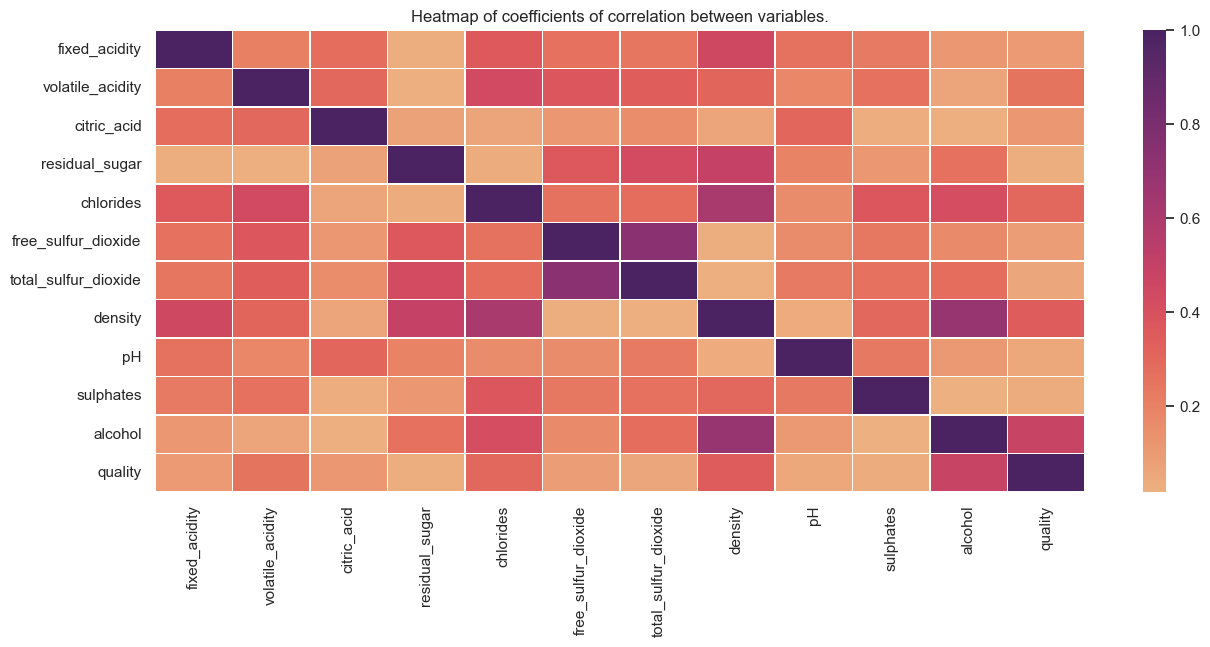

In [44]:
plt.figure(figsize=(15,6))
sns.set(font_scale=1)
sns.heatmap(correlation_matrix.abs(), cmap="flare", linewidths=.5).set(title='Heatmap of coefficients of correlation between variables.')
plt.show()

***
#### Conclusions. Apart from a rather expected and obvious correlation between 'free_sulfur_dioxide' and 'total_sulfur_dioxide' (0.74), the only correlations worth to be noted are between 'density' and 'alcohol' (0.68), 'density' and 'chlorides' (0.61), as well as between 'density' and 'residual sugar' (0.49).
***

#### 3.2.5. Visualisation of the data-set on two-dimensional space using Principal Component Analysis (PCA).

In [45]:
pca_model_2d = PCA(n_components=2)
pca_dataset_2d = pd.DataFrame(pca_model_2d.fit_transform(wines.drop('wine_type', axis = 1)),
                              columns = ['component_1', 'component_2'])
pca_dataset_2d['wine_type'] = wines.wine_type.replace([0, 1], ['white', 'red']).values

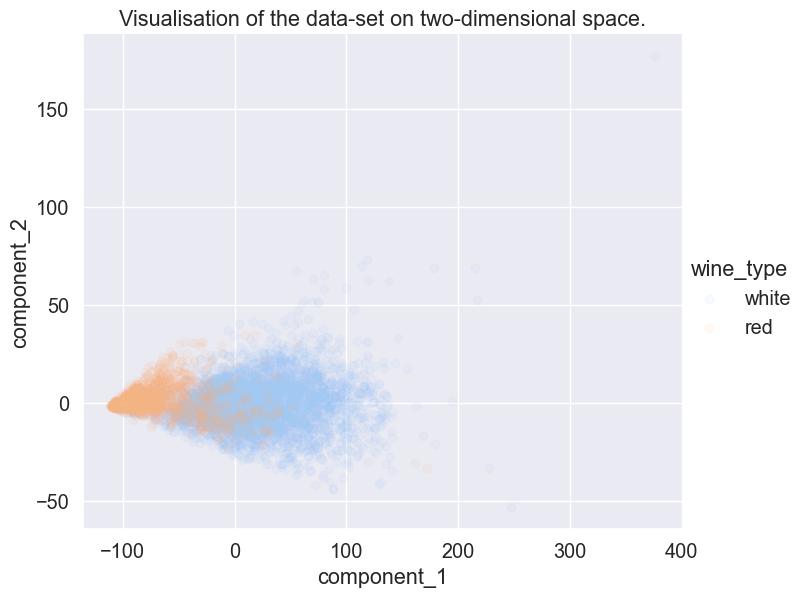

In [46]:
sns.set(font_scale=1.3)
#sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
#sns.set_style("whitegrid")
sns.lmplot(data=pca_dataset_2d,
           x='component_1',
           y='component_2',
           hue='wine_type',
           palette='pastel',
#           markers=["x", "o"],
           fit_reg=False,
           scatter_kws={'alpha':0.075},
           height=6,
           aspect=1.2).set(title='Visualisation of the data-set on two-dimensional space.')
plt.show()

***
#### Conclusions. Visualisation of the data-set on two-dimensional space using Principal Component Analysis reveals that there are some differences between both types of wine as well as there are some outliers.
***

## 4. Data-set modelling.

### 4.1. Data-set preparation.

#### 4.1.1 Copying target varieble to 'y' series and dropping it from the 'wines' data-set.

In [47]:
y = wines.wine_type
wines.drop('wine_type', axis=1, inplace=True)

#### 4.1.2. Splitting a data-set into training and test sets.

In [48]:
#wines_scaled = scale(wines)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(wines, y, test_size=0.20, random_state=5062018, stratify=y)

In [50]:
print('Distribution of the wine_types in (0) the entire data-set, (1) training set and (2) test set.')
print('--------------------------------------------------------------------------------')
print('(0) The entire data-set:')
print('--------------------------------------------------------------------------------')
print(y.value_counts(normalize=True))
print('--------------------------------------------------------------------------------')
print('(1) Training set:')
print('--------------------------------------------------------------------------------')
print(y_train.value_counts(normalize=True))
print('--------------------------------------------------------------------------------')
print('(2) Test set:')
print('--------------------------------------------------------------------------------')
print(y_test.value_counts(normalize=True))

Distribution of the wine_types in (0) the entire data-set, (1) training set and (2) test set.
--------------------------------------------------------------------------------
(0) The entire data-set:
--------------------------------------------------------------------------------
0    0.744549
1    0.255451
Name: wine_type, dtype: float64
--------------------------------------------------------------------------------
(1) Training set:
--------------------------------------------------------------------------------
0    0.744596
1    0.255404
Name: wine_type, dtype: float64
--------------------------------------------------------------------------------
(2) Test set:
--------------------------------------------------------------------------------
0    0.744361
1    0.255639
Name: wine_type, dtype: float64


### TMP. Model 1 - Decision Tree Classifier with default parameters.

In [51]:
#?DecisionTreeClassifier

In [86]:
def cv_and_score_model(model, x, y, prints):
    """Model scorer. Calculates: average gini score, average recall and stability.

    Parameters:
    -----------
    model: sklearn predictive model, model that will be scored
    
    x : pandas DataFrame, set of x-features

    y : pandas Series, target feature
    """
    
    cv_auc = cross_val_score(model, x, y, cv = 10, scoring = 'roc_auc')
    cv_recall = cross_val_score(model, x, y, cv = 10, scoring = 'recall')
    
    # Calculate Gini score based on AUC.
    cv_gini = (cv_auc * 2) - 1 
    
    # Printing results.
    if prints:
        print('Average Gini: {}.'.format(np.mean(cv_gini).round(6)))
        print('Average recall: {}.'.format(np.mean(cv_recall).round(6)))
        print('Stability: {}%'.format((100 - np.std(cv_gini)*100/cv_gini.mean()).round(6)))

    return cv_gini

In [87]:
def test_model(model, features, plots):
    """Model scorer. Calculates: average gini score, average recall and stability.

    Parameters:
    -----------
    model: sklearn predictive model, model that will be tested
    
    plots : bool, decission whether to print plots
    """
    
    model.fit(X_train[features], y_train)
    pred_prob = model.predict_proba(X_test[features])
    y_pred = model.predict(X_test[features])
    
    # convert 2D list to list of probabilities
    prob = []
    for n in pred_prob:
        prob.append(n[1])
    gini_score = (2* roc_auc_score(y_test, prob))-1
    
    # calculate FPR and TPR
    fpr, tpr, thresholds = roc_curve(y_test, prob)
    
    print('Gini score: {}.'.format(gini_score.round(6)))
    print('Recall score: {}.'.format(recall_score(y_test, y_pred).round(6)))
    
    if plots == True:
        # ROC CURVE
        plt.figure()
        lw = 2
        plt.plot(fpr, tpr, color='blue',
                 lw=lw, label='ROC curve (AUC = %0.3f)' % roc_auc_score(y_test, prob))
        plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC curve')
        plt.legend(loc="lower right")
        plt.show()

        # DENSITY PLOT
        pre = pd.DataFrame(prob, columns = ['prob'])
        pre['pred_class'] = 1
        pre.loc[pre.prob < 0.5,'pred_class'] = 0
        pre['real_class'] = list(y_test)

        sns.distplot(pre[pre.real_class == 0]['prob'], label = 'negatives').set(title = 'Density plot', xlabel = 'probability')
        sns.distplot(pre[pre.real_class == 1]['prob'], label = 'positives').set(title = 'Density plot', xlabel = 'probability')
        plt.legend()
        plt.show()

In [54]:
model_1 = DecisionTreeClassifier()

In [55]:
gini = cv_and_score_model(model_1, X_train, y_train, True)

Average Gini: 0.948.
Average recall: 0.964.
Stability: 98.531%


Gini score: 0.969.
Recall score: 0.982.


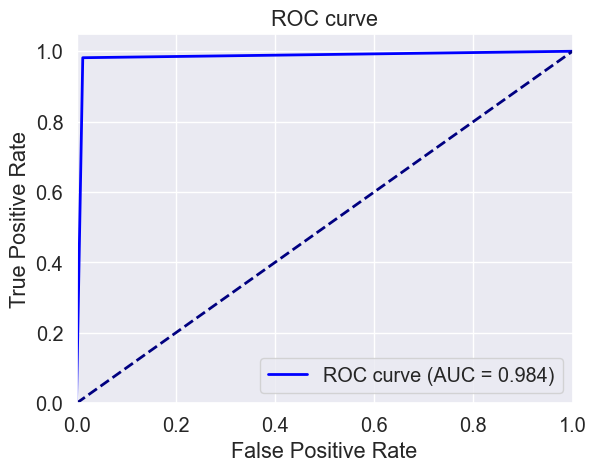

/home/gnowak/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/gnowak/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


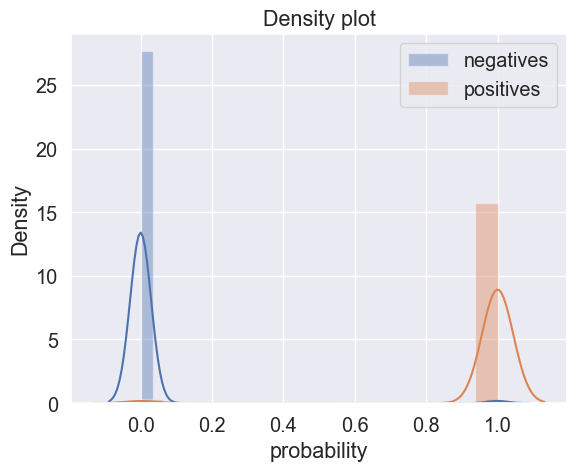

In [56]:
test_model(model_1, X_train.columns, True)

***
#### Model 1 - Decision Tree Classifier with default parameters. Conclusions.
***

### 4.2. Selection of the best models based on accuracy (ACC) and Area Under receiver operating characteristic (ROC) Curve (AUC) .

In [57]:
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    SVC(probability=True),
    RandomForestClassifier(),
    KNeighborsClassifier(),
    XGBClassifier()
]

print('---------------------------------------------------')
print('|{0:^25}|{1:^11}|{2:^11}|'.format('MODEL','ACC','AUC'))
for model in models:
    model.fit(X_train, y_train)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    y_pred = np.round(y_pred_proba)
    
    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_true=y_test, y_score=y_pred_proba)
    gini = (auc * 2) - 1
    
    print('---------------------------------------------------')
    print('|{0:25s}|{1:11.6f}|{2:11.6f}|'.format(model.__class__.__name__, acc, auc))
    print('---------------------------------------------------')
    
#    gini = cv_and_score_model(model, X_train, y_train, True)
#    test_model(model, X_train.columns, False)

---------------------------------------------------
|          MODEL          |    ACC    |    AUC    |
---------------------------------------------------
|LogisticRegression       |   0.977444|   0.994638|
---------------------------------------------------
---------------------------------------------------
|DecisionTreeClassifier   |   0.988722|   0.987597|
---------------------------------------------------


/home/gnowak/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


---------------------------------------------------
|SVC                      |   0.927632|   0.950382|
---------------------------------------------------
---------------------------------------------------
|RandomForestClassifier   |   0.994361|   0.996908|
---------------------------------------------------
---------------------------------------------------
|KNeighborsClassifier     |   0.938910|   0.962945|
---------------------------------------------------
[11:11:30] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/gnowak/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


---------------------------------------------------
|XGBClassifier            |   0.994361|   0.996263|
---------------------------------------------------


***
#### Conclusions. There are 2 very good models. The best one is RandomForestClassifier (AUC = 0.996888). XGBClassifier is only slightly worst (AUC = 0.996263). The last one that may be taken into account is DecisionTreeClassifier (AUC = 0.988172).
***

### 4.3.1. Model 1.1. - DecisionTreeClassifier with GridSearchCV().

In [58]:
dtc_gs_parameters = {'criterion':('entropy', 'gini'),
                     'splitter':('best','random'),
                     'max_depth':np.arange(1, 6),
                     'min_samples_split':np.arange(2,10),
                     'min_samples_leaf':np.arange(1,5)}

In [59]:
dtc_gs = GridSearchCV(DecisionTreeClassifier(), dtc_gs_parameters, cv=10)

In [60]:
dtc_gs.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ('entropy', 'gini'),
                         'max_depth': array([1, 2, 3, 4, 5]),
                         'min_samples_leaf': array([1, 2, 3, 4]),
                         'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'splitter': ('best', 'random')})

In [61]:
dtc_gs_best_parameters = dtc_gs.best_params_

In [62]:
print('Best parameters choosed by GridSearchCV: {}'.format(dtc_gs_best_parameters))

Best parameters choosed by GridSearchCV: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 3, 'splitter': 'best'}


In [63]:
dtc_gs_model = DecisionTreeClassifier(**dtc_gs_best_parameters)

In [64]:
gini = cv_and_score_model(dtc_gs_model, X_train, y_train, True)

Average Gini: 0.97.
Average recall: 0.956.
Stability: 98.814%


Gini score: 0.970556.
Recall score: 0.955882.


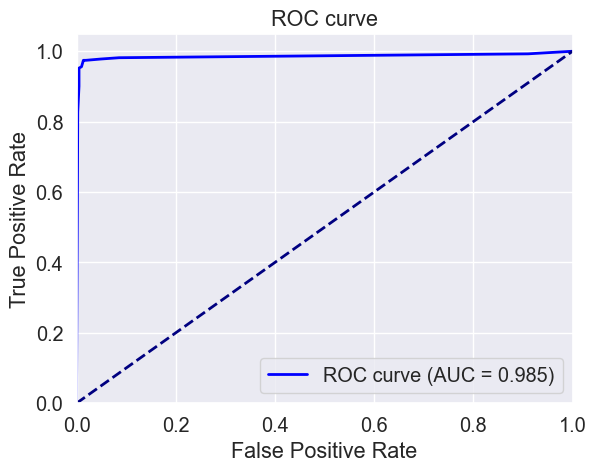

/home/gnowak/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/gnowak/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


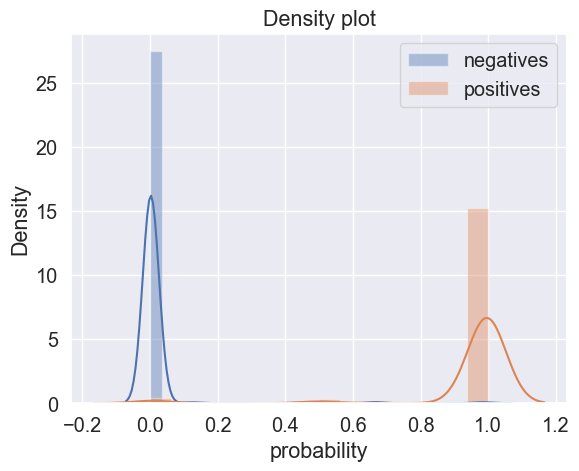

In [106]:
test_model(dtc_gs_model, X_train.columns, True)

### 4.3.2. Model 1.2. - DecisionTreeClassifier with RandomizedSearchCV().

In [107]:
dtc_rs_parameters = {'criterion':('entropy', 'gini'),
                     'splitter':('best','random'),
                     'max_depth':randint(1,6),
                     'min_samples_split':randint(2,10),
                     'min_samples_leaf':randint(1,5)}

In [108]:
dtc_rs = RandomizedSearchCV(DecisionTreeClassifier(), cv = 10, n_iter = 20, param_distributions = dtc_rs_parameters)

In [109]:
dtc_rs.fit(X_train, y_train)

RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_iter=20,
                   param_distributions={'criterion': ('entropy', 'gini'),
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fb4444803d0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fb44599d6a0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fb4481f7af0>,
                                        'splitter': ('best', 'random')})

In [110]:
dtc_rs_best_parameters = dtc_rs.best_params_

In [111]:
print('Best parameters choosed by RandomizedSearchCV: {}'.format(dtc_rs_best_parameters))

Best parameters choosed by RandomizedSearchCV: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5, 'splitter': 'best'}


In [112]:
dtc_rs_model = DecisionTreeClassifier(**dtc_rs_best_parameters)

In [113]:
gini = cv_and_score_model(dtc_rs_model, X_train, y_train, True)

Average Gini: 0.968104.
Average recall: 0.955844.
Stability: 98.971906%


In [114]:
#pd.Series(model_1.feature_importances_, index = list(X_train.columns)).sort_values(ascending = False)

Gini score: 0.95669.
Recall score: 0.959559.


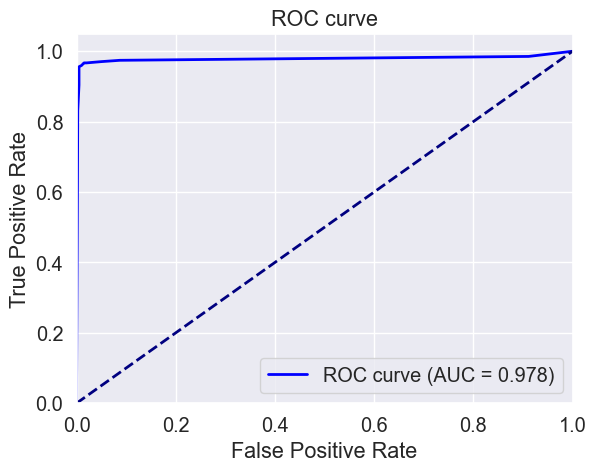

/home/gnowak/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/gnowak/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


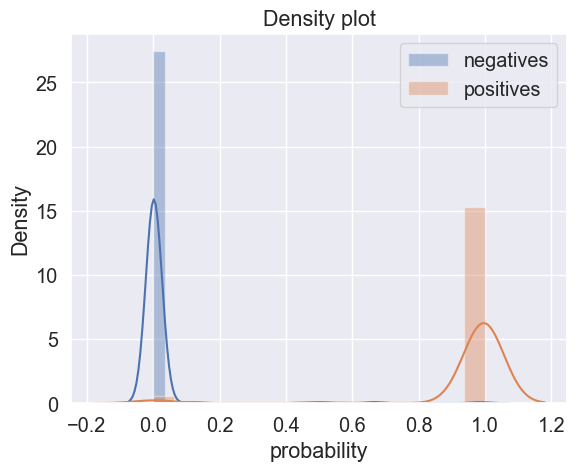

In [115]:
test_model(dtc_rs_model, X_train.columns, True)

### 4.4. Model 2. - RandomForestClassifier with RandomizedSearchCV().

In [116]:
rfc_rs_parameters = {'n_estimators': randint(1,200),#[3, 5, 10, 15, 25, 50, 100],
                     'criterion':('entropy', 'gini'),
                     'max_depth':randint(1,10),
                     'min_samples_split':randint(5,100),# [30, 40, 50, 100],
                     'min_samples_leaf':randint(5,100),# [30, 40, 50, 100],
                     'max_features':randint(1,20)}# [5, 10, 20]
#            'n_estimators': [200],
#            'max_features': [20],
#            'max_depth': [30, 40, 50, 70, 100],
#            'min_samples_leaf': [30, 40, 50, 100],
#            'min_samples_split': [30, 40, 50, 100]
#

In [117]:
rfc_rs = RandomizedSearchCV(RandomForestClassifier(), cv = 10, n_iter = 20, param_distributions = rfc_rs_parameters)

In [118]:
rfc_rs.fit(X_train, y_train)

/home/gnowak/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
90 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "/home/gnowak/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/gnowak/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 442, in fit
    trees = Parallel(
  File "/home/gnowak/.local/lib/python3.8/site-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/gnowak/.local/lib/

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'criterion': ('entropy', 'gini'),
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fb445ab16a0>,
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fb44a3607f0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fb444d2b6d0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fb445cfdee0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fb445e0aac0>})

In [119]:
rfc_rs_best_parameters = rfc_rs.best_params_

In [120]:
print('Best parameters choosed by RandomizedSearchCV: {}'.format(rfc_rs_best_parameters))

Best parameters choosed by RandomizedSearchCV: {'criterion': 'entropy', 'max_depth': 4, 'max_features': 4, 'min_samples_leaf': 19, 'min_samples_split': 25, 'n_estimators': 189}


In [121]:
rfc_rs_model = RandomForestClassifier(**rfc_rs_best_parameters)

In [122]:
gini = cv_and_score_model(rfc_rs_model, X_train, y_train, True)

Average Gini: 0.994101.
Average recall: 0.963209.
Stability: 99.473336%


Gini score: 0.99066.
Recall score: 0.963235.


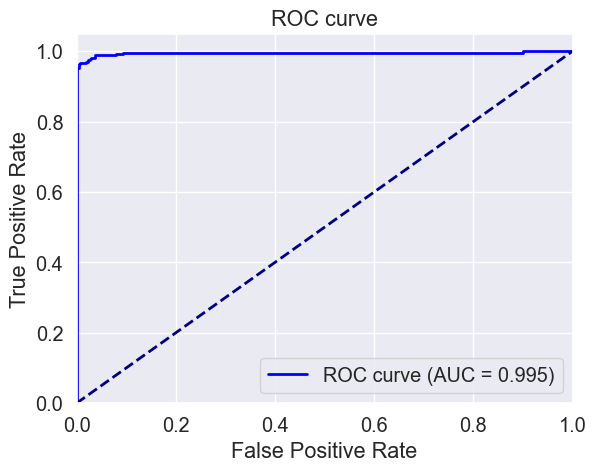

/home/gnowak/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/gnowak/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


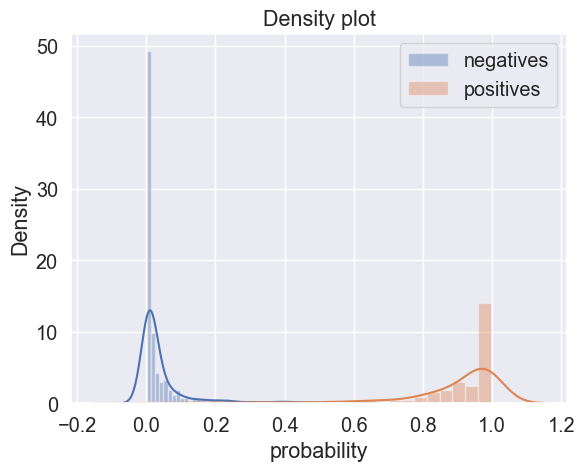

In [123]:
test_model(rfc_rs_model, X_train.columns, True)

### 4.5. Model 3 - XGBoost Classifier with RandomizedSearchCV().

In [152]:
xgb_rs_parameters = {'n_estimators': randint(10, 50),
                     'learning_rate': uniform(0.01, 0.3),
                     'max_depth': randint(2, 8),
                     'min_child_weight': randint(1, 30),
                     'reg_lambda': uniform(0.1, 4)# [5, 10, 20]
                    }
#param_grid = {'n_estimators': randint(10, 50),
#              'learning_rate': uniform(0.01, 0.3),
#              'max_depth': randint(2, 8),
#              'min_child_weight': randint(1, 30),
#              'reg_lambda': uniform(0.1, 4)
#}

In [153]:
xgb_rs = RandomizedSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='error'), cv = 10, n_iter = 20, param_distributions = xgb_rs_parameters)

In [154]:
xgb_rs.fit(X_train, y_train)

RandomizedSearchCV(cv=10,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False,
                                           eval_metric='error', gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan...
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fb446088760>,
                                        'max_depth':

In [155]:
xgb_rs_best_parameters = xgb_rs.best_params_

In [156]:
print('Best parameters choosed by RandomizedSearchCV: {}'.format(xgb_rs_best_parameters))

Best parameters choosed by RandomizedSearchCV: {'learning_rate': 0.29543588841075363, 'max_depth': 3, 'min_child_weight': 2, 'n_estimators': 32, 'reg_lambda': 3.7106980266657943}


In [157]:
xgb_rs_model = XGBClassifier(**xgb_rs_best_parameters, use_label_encoder=False, eval_metric='error')

In [158]:
gini = cv_and_score_model(xgb_rs_model, X_train, y_train, True)

Average Gini: 0.996717.
Average recall: 0.982543.
Stability: 99.450396%


Gini score: 0.990651.
Recall score: 0.985294.


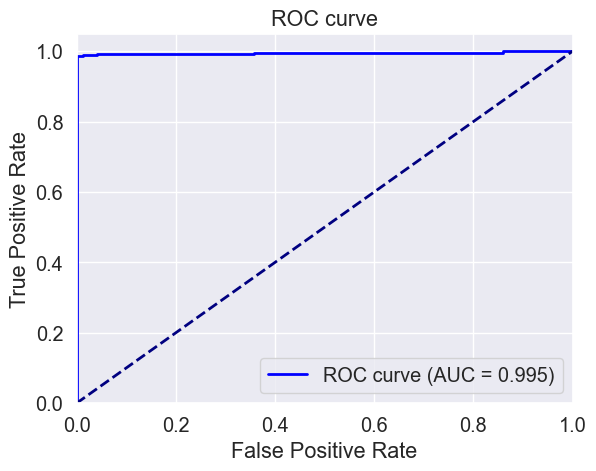

/home/gnowak/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/gnowak/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


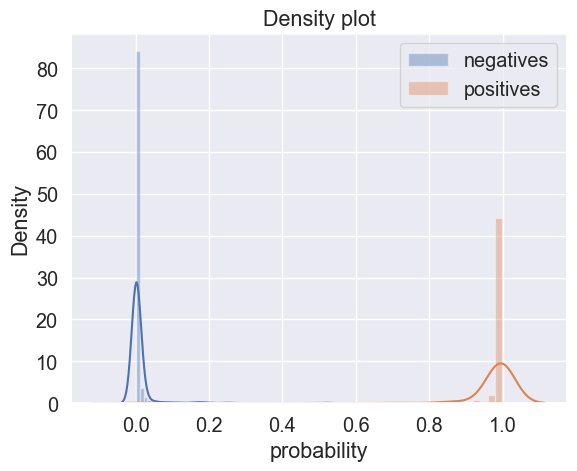

In [159]:
test_model(xgb_rs_model, X_train.columns, True)

### 5. Comparion of models and sample prediction.

In [160]:
test_model(dtc_gs_model, X_train.columns, False)
test_model(dtc_rs_model, X_train.columns, False)
test_model(rfc_rs_model, X_train.columns, False)
test_model(xgb_rs_model, X_train.columns, False)

Gini score: 0.970477.
Recall score: 0.955882.
Gini score: 0.970635.
Recall score: 0.959559.
Gini score: 0.990567.
Recall score: 0.963235.
Gini score: 0.990651.
Recall score: 0.985294.


In [164]:
samples = X_test.sample(25).sort_index()

In [165]:
samples

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
328,13.4,0.27,0.62,2.60,0.082,6.0,21.0,1.00020,3.16,0.67,9.7,6
506,7.3,0.51,0.26,3.30,0.090,7.0,135.0,0.99440,3.01,0.52,8.8,5
762,8.8,0.70,0.00,1.70,0.069,8.0,19.0,0.99701,3.31,0.53,10.0,6
945,10.2,0.44,0.42,2.00,0.071,7.0,20.0,0.99566,3.14,0.79,11.1,7
1316,5.4,0.74,0.00,1.20,0.041,16.0,46.0,0.99258,4.01,0.59,12.5,6
1370,8.7,0.78,0.51,1.70,0.415,12.0,66.0,0.99623,3.00,1.17,9.2,5
1399,7.0,0.20,0.34,5.70,0.035,32.0,83.0,0.99280,3.19,0.46,11.5,6
1460,6.4,0.42,0.09,2.30,0.054,34.0,64.0,0.99724,3.41,0.68,10.4,6
1547,6.3,0.60,0.10,1.60,0.048,12.0,26.0,0.99306,3.55,0.51,12.1,5
1598,6.3,0.24,0.74,1.40,0.172,24.0,108.0,0.99320,3.27,0.39,9.9,6


In [166]:
y_test[y_test.index.isin(samples.index)].sort_index(inplace=True)

In [167]:
pd.DataFrame({'wine_type-true' : y_test[y_test.index.isin(samples.index)], 'wine_type-predicted' : xgb_rs_model.predict(samples)}, index=samples.index)

ValueError: cannot reindex from a duplicate axis

In [169]:
samples = X_test.sample(25).sort_index()
samples

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
273,8.4,0.715,0.20,2.40,0.076,10.0,38.0,0.99735,3.31,0.64,9.4,5
387,8.3,0.660,0.15,1.90,0.079,17.0,42.0,0.99720,3.31,0.54,9.6,6
388,6.7,0.210,0.32,5.40,0.047,29.0,140.0,0.99500,3.39,0.46,9.7,6
429,12.8,0.840,0.63,2.40,0.088,13.0,35.0,0.99970,3.10,0.60,10.4,6
458,6.0,0.370,0.32,1.00,0.053,31.0,218.5,0.99240,3.29,0.72,9.8,6
525,10.4,0.640,0.24,2.80,0.105,29.0,53.0,0.99980,3.24,0.67,9.9,5
630,7.0,0.230,0.42,18.05,0.050,35.0,144.0,0.99990,3.22,0.42,8.8,5
687,6.8,0.670,0.30,13.00,0.290,22.0,193.0,0.99840,3.08,0.67,9.0,4
913,9.4,0.395,0.46,4.60,0.094,3.0,10.0,0.99639,3.27,0.64,12.2,7
961,8.0,0.420,0.36,5.00,0.037,34.0,101.0,0.99200,3.13,0.57,12.3,7


In [171]:
y_test[y_test.index.isin(samples.index)].sort_index(inplace=True)
pd.DataFrame({'true' : y_test[y_test.index.isin(samples.index)], 'predicted' : xgb_rs_model.predict(samples)}, index=samples.index)

ValueError: cannot reindex from a duplicate axis